In [59]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import nengo
import nengo_spa as spa

from nengo_learn_assoc_mem.utils import norm_spa_vecs

In [60]:
def numpy_bytes_to_str(lst):
    return [l.decode('utf-8') for l in lst]

In [61]:
with h5py.File("../data/fami_sys_run.h5py", "r") as fi:
    print(list(fi.keys()))
    inp = np.array(fi['input'])
    output = np.array(fi['output'])
    
    fan1 = numpy_bytes_to_str(fi['fan1'])
    fan2 = numpy_bytes_to_str(fi['fan2'])
    foil1 = numpy_bytes_to_str(fi['foil1'])
    foil2 = numpy_bytes_to_str(fi['foil2'])
    
    v_strs = numpy_bytes_to_str(fi['vocab_strings'])
    v_vecs = list(fi['vocab_vectors'])
    
    accum = np.array(fi['accum'])
    clean = np.array(fi['clean'])
    de_out = np.array(fi['de_out'])
    #t_range = np.arange(0, fi['t_range'][0], fi['t_range'][1])
    #D = int(fi['dimensions])

['accum', 'clean', 'correct', 'de_out', 'ens_spikes', 'fan1', 'fan2', 'foil1', 'foil2', 'input', 'output', 't_range', 'vocab_strings', 'vocab_vectors']


In [62]:
t_range = np.arange(0, len(inp)*0.001, 0.001)

In [63]:
D = len(v_vecs[0])
vocab = spa.Vocabulary(D)

In [64]:
for val, vec in zip(v_strs, v_vecs):
    vocab.add(val, vec)

In [65]:
fan1_pair_vecs = norm_spa_vecs(vocab, fan1)
fan2_pair_vecs = norm_spa_vecs(vocab, fan2)
foil1_pair_vecs = norm_spa_vecs(vocab, foil1)
foil2_pair_vecs = norm_spa_vecs(vocab, foil2)

In [66]:
win = int(len(fan1+fan2)*(0.3+0.1) / 0.001)

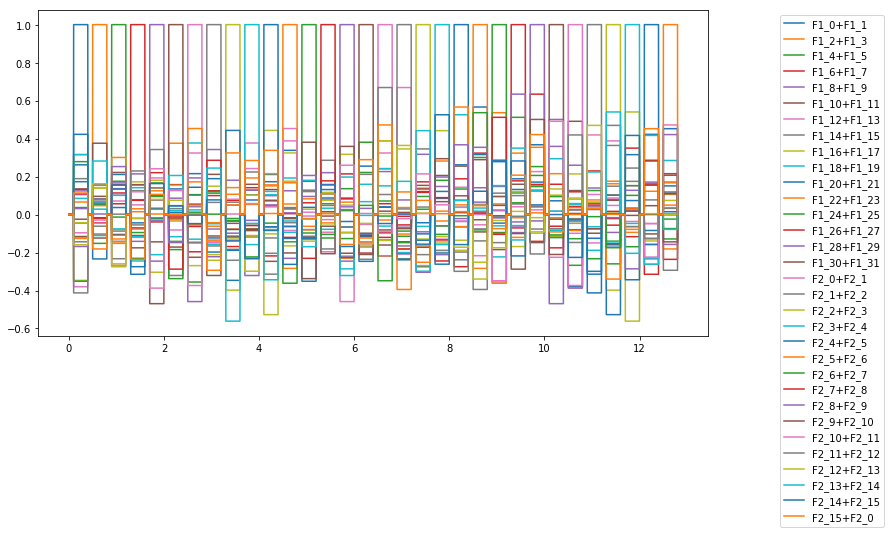

In [67]:
plt.figure(figsize=(12, 6))
win = int(len(fan1+fan2)*(0.3+0.1) / 0.001)
plt.plot(t_range[:win], spa.similarity(inp, fan1_pair_vecs+fan2_pair_vecs)[:win])
plt.legend(fan1+fan2, bbox_to_anchor=(1.1, 1))

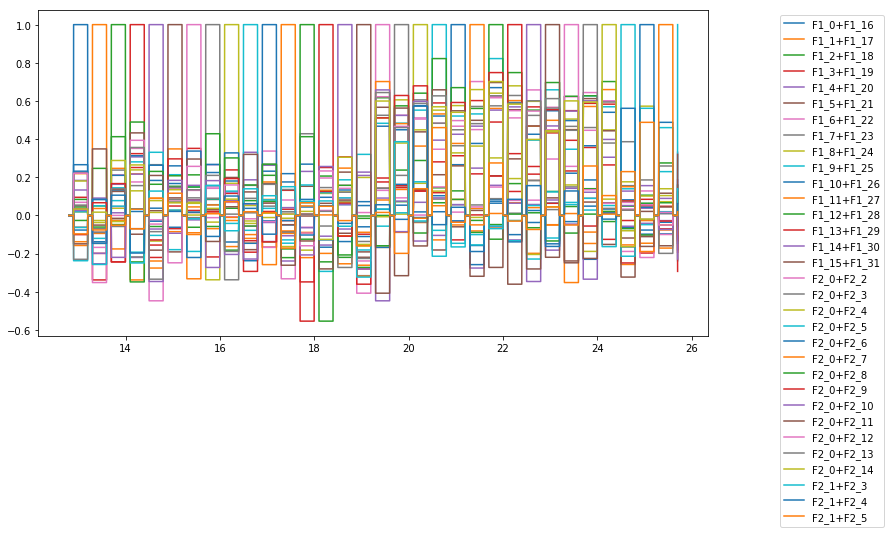

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(t_range[win:], spa.similarity(inp, foil1_pair_vecs+foil2_pair_vecs)[win:])
plt.legend(foil1+foil2, bbox_to_anchor=(1.1, 1))

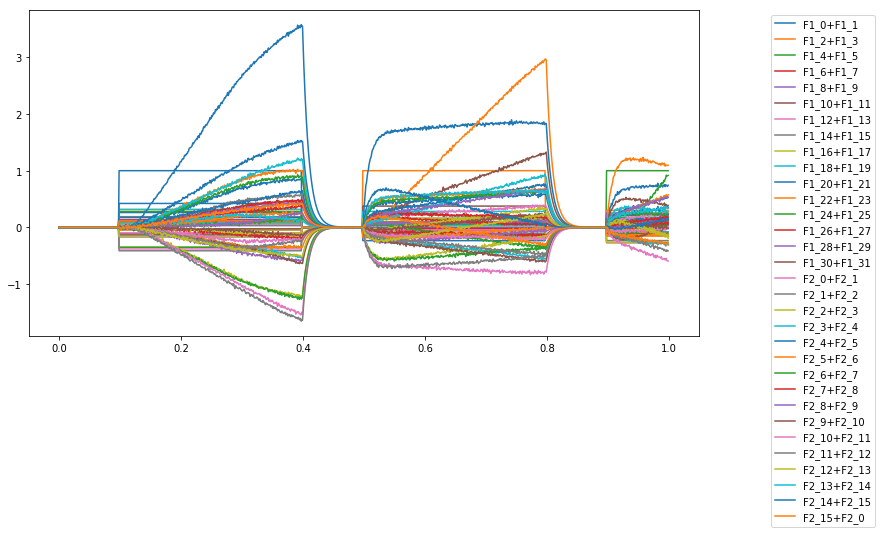

In [86]:
win = 1000

plt.figure(figsize=(12, 6))
plt.plot(t_range[:win], spa.similarity(inp, fan1_pair_vecs+fan2_pair_vecs)[:win])
plt.gca().set_prop_cycle(None)
plt.plot(t_range[:win], spa.similarity(accum, fan1_pair_vecs+fan2_pair_vecs)[:win])
plt.legend(fan1+fan2, bbox_to_anchor=(1.1, 1))

# Reaction Time

FAN1 should be faster than FAN2. Should be minimal difference between FAN and FOIL.

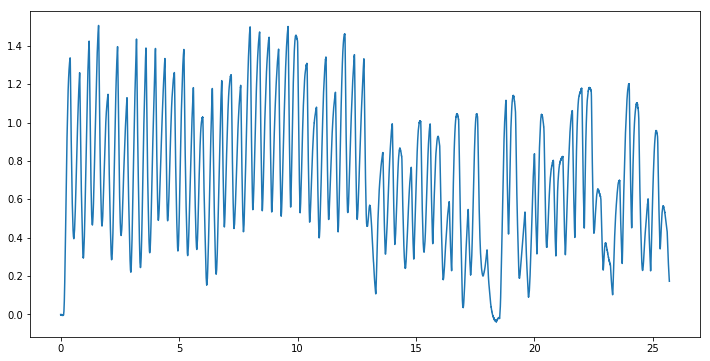

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(t_range, output)

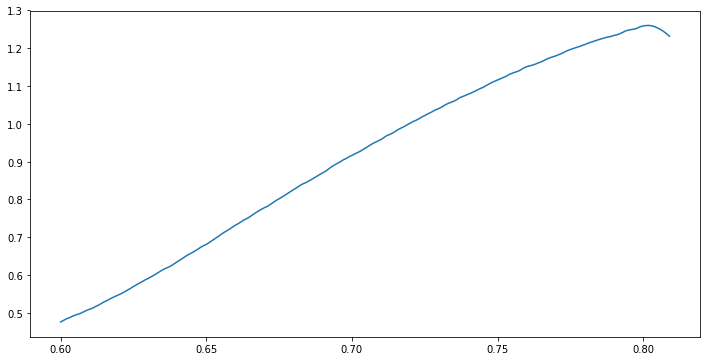

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(t_range[600:810], output[600:810])

# Error Rate

FAN1 should be more accurate than FAN2. Should be no difference between FAN and FOIL.